# UC Hyperbaric O2 Qiime Analysis

In [1]:
# Initializes the notebook with inline display
%matplotlib inline

from os import mkdir
import os
import copy
from os.path import abspath, join as pjoin, exists
from shutil import copy2, move
from time import strftime, strptime
from numpy import nan, isnan, arange
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
import pingouin as pg
from scipy import stats


In [25]:
#df = pd.read_csv("./NormalizedDataAllMetaproIQ.csv",index_col= "datarest$ProteinID")
#df = pd.read_csv('./MetabTableProteomeID_div10000_noOutlier.txt', sep = '\t', index_col = '#MetaboliteID')

#Test if the divide by 10000 hack is necessary in the latest version of Qiime2:
df = pd.read_csv('./MetabTableProteomeID.txt', sep = '\t', index_col = '#MetaboliteID')



In [11]:
#Metabolomics - Remove non-sample rows
rows = ['row m/z', 'row retention time']
df.drop(columns = rows, inplace = True)

In [12]:
#Save metabolomics table with only samples
df.to_csv('./Metabolomics.txt', sep = '\t')

In [13]:
metadata = pd.read_csv('../Metadata_For_Proteomics.txt', sep = '\t')
metadata

,#SampleID,Sample_ID_noqiita,ProteomeID,PatientID_Treatment,host_subject_id,trial_arm,timepoint,BarcodeSequence,LinkerPrimerSequence,filename,...,response_d5,response_daytruefalse,sample_type,scientific_name,second_line_therapy,sex,steroids,taxon_id,title,Description
0,11149.00007,72848,PD4,DH 10 before sham,DH 10,sham,1,XXQIITAXX,XXQIITAXX,72848.mzXML Peak area,...,FALSE,FALSE,stool,human gut metagenome,TRUE,female,FALSE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
1,11149.dhmc.9.1,dhmc.9.1,PD24,DH 9 before sham,DH 9,sham,1,XXQIITAXX,XXQIITAXX,dhmc_9_1.mzXML Peak area,...,TRUE,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
2,11149.00007,72846,PD13,DH11 before sham,DH11,sham,1,XXQIITAXX,XXQIITAXX,72846.mzXML Peak area,...,TRUE,FALSE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
3,11149.00007,72843,PD14,P2 before sham,P2,sham,1,XXQIITAXX,XXQIITAXX,72843.mzXML Peak area,...,FALSE,FALSE,stool,human gut metagenome,TRUE,male,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
4,11149.dhmc.1.1,dhmc.1.1,PD15,DH 1 before treatment,DH 1,treatment,1,XXQIITAXX,XXQIITAXX,dhmc_1_1.mzXML Peak area,...,TRUE,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
5,11149.dhmc.6.1,dhmc.6.1,PD22,DH 6 before treatment,DH 6,treatment,1,XXQIITAXX,XXQIITAXX,dhmc_6_1.mzXML Peak area,...,TRUE,TRUE,stool,human gut metagenome,FALSE,female,FALSE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
6,11149.dhmc.7.1,dhmc.7.1,PD18,DH 7 before treatment,DH 7,treatment,1,XXQIITAXX,XXQIITAXX,dhmc_7_1.mzXML Peak area,...,FALSE,FALSE,stool,human gut metagenome,TRUE,female,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
7,11149.dhmc.8.1,dhmc.8.1,PD25,DH 8 before treatment,DH 8,treatment,1,XXQIITAXX,XXQIITAXX,dhmc_8_1.mzXML Peak area,...,FALSE,FALSE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
8,11149.00007,72852,PD5,DH12 before treatment,DH12,treatment,1,XXQIITAXX,XXQIITAXX,72852.mzXML Peak area,...,TRUE,TRUE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...
9,11149.00007,72845,PD6,DH13 before treatment,DH13,treatment,1,XXQIITAXX,XXQIITAXX,72845.mzXML Peak area,...,TRUE,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,hyperbaric oxygen intervention for ulcerative ...


In [61]:
#Convert metabolomics table
!biom convert -i ./MetabTableProteomeID_div10000_noOutlier.txt \
-o ./Metabolomics.biom \
-m ../Metadata_For_Metabolomics_qiime.txt \
--table-type="OTU table" --to-hdf5

In [2]:
#Convert metabolomics table
!biom convert -i ./MetabTableProteomeID.txt \
-o ./Metabolomics_nodiv.biom \
-m ../Metadata_For_Metabolomics_qiime.txt \
--table-type="OTU table" --to-hdf5

In [7]:
!biom convert -i ./CSVs/NormalizedCommonRepsIDs.txt \
-o ./NormalizedCommonReps.biom \
-m ../Metadata_For_Proteomics_qiime.txt \
--table-type="OTU table" --to-hdf5

In [27]:
#Typically use common reps but here I'm trying something with the dataall file
!biom convert -i ./NormalizedDataAll_0s.txt \
-o ./NormalizedDataAll_0s.biom \
-m ../Metadata_For_Proteomics_qiime.txt \
--table-type="OTU table" --to-hdf5

In [8]:
!qiime tools import \
  --input-path ./NormalizedCommonReps.biom \
  --type 'FeatureTable[Frequency]' \
  --output-path NormalizedCommmonReps_biom.qza

Imported ./NormalizedCommonReps.biom as BIOMV210DirFmt to NormalizedCommmonReps_biom.qza


In [28]:
!qiime tools import \
  --input-path ./NormalizedDataAll_0s.biom \
  --type 'FeatureTable[Frequency]' \
  --output-path NormalizedDataAll_0s_biom.qza

Imported ./NormalizedDataAll_0s.biom as BIOMV210DirFmt to NormalizedDataAll_0s_biom.qza


In [62]:
#Import metabolome
!qiime tools import \
  --input-path ./Metabolomics.biom \
  --type 'FeatureTable[Frequency]' \
  --output-path Metabolomics_biom.qza

Imported ./Metabolomics.biom as BIOMV210DirFmt to Metabolomics_biom.qza


In [28]:
!qiime feature-table summarize \
  --i-table ./Metabolomics_biom.qza \
  --o-visualization ./Metabolomics_biom.qzv \
  --m-sample-metadata-file ../Metadata_For_Metabolomics_qiime.txt

Saved Visualization to: ./Metabolomics_biom.qzv


In [39]:
!qiime diversity core-metrics \
  --i-table ./NormalizedCommmonReps_biom.qza \
    --p-sampling-depth 297742 \
--m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
--output-dir core-metrics-results_IGCMP

Saved FeatureTable[Frequency] to: core-metrics-results_IGCMP/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_IGCMP/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_IGCMP/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_IGCMP/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_IGCMP/bray_curtis_emperor.qzv


In [40]:
!qiime diversity core-metrics \
  --i-table ./Metabolomics_biom.qza \
    --p-sampling-depth 952900 \
--m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
--output-dir core-metrics-results_MetabolomicsNoOutlier

Saved FeatureTable[Frequency] to: core-metrics-results_MetabolomicsNoOutlier/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomicsNoOutlier/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomicsNoOutlier/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomicsNoOutlier/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomicsNoOutlier/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomicsNoOutlier/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_MetabolomicsNoOutlier/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_MetabolomicsNoOutlier/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_MetabolomicsNoOutlier/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_MetabolomicsNoOutlier/bray_curtis_emperor.qzv


In [31]:
## filter only treatment group - Metabolomics
!qiime feature-table filter-samples \
  --i-table ./Metabolomics_biom.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
  --p-where "trial_arm='treatment'" \
  --o-filtered-table Metabolomics_treatment_biom.qza

Saved FeatureTable[Frequency] to: Metabolomics_treatment_biom.qza


In [10]:
## filter treatment & healthy group - Metaproteome
!qiime feature-table filter-samples \
  --i-table ./NormalizedCommmonReps_biom.qza \
  --m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
  --p-where "trial_arm IN ('treatment','helathy_control')" \
  --o-filtered-table CommonReps_treatment_healthy_biom.qza

Saved FeatureTable[Frequency] to: CommonReps_treatment_healthy_biom.qza


In [33]:
## filter treatment group - Metaproteome - ALL DATA FOR DEICODE
!qiime feature-table filter-samples \
  --i-table ./NormalizedDataAll_0s_biom.qza \
  --m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
  --p-where "trial_arm IN ('treatment')" \
  --o-filtered-table DataAll_treatment_biom.qza

Saved FeatureTable[Frequency] to: DataAll_treatment_biom.qza


In [34]:
!qiime feature-table filter-samples \
  --i-table ./NormalizedDataAll_0s_biom.qza \
  --m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
  --p-where "trial_arm IN ('sham')" \
  --o-filtered-table DataAll_sham_biom.qza

Saved FeatureTable[Frequency] to: DataAll_sham_biom.qza


In [32]:
!qiime diversity core-metrics \
--i-table ./Metabolomics_treatment_biom.qza \
--p-sampling-depth 952900\
--m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
--output-dir core-metrics-results_MetabolomeTreatment

Saved FeatureTable[Frequency] to: core-metrics-results_MetabolomeTreatment/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeTreatment/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeTreatment/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeTreatment/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomeTreatment/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomeTreatment/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_MetabolomeTreatment/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_MetabolomeTreatment/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_MetabolomeTreatment/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_MetabolomeTreatment/bray_curtis_emperor.qzv


In [11]:
!qiime diversity core-metrics \
  --i-table ./CommonReps_treatment_healthy_biom.qza \
    --p-sampling-depth 297742 \
--m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
--output-dir core-metrics-results_IGCMP_TreatmentHealthy

Saved FeatureTable[Frequency] to: core-metrics-results_IGCMP_TreatmentHealthy/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_TreatmentHealthy/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_TreatmentHealthy/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_TreatmentHealthy/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP_TreatmentHealthy/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP_TreatmentHealthy/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_IGCMP_TreatmentHealthy/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_IGCMP_TreatmentHealthy/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_IGCMP_TreatmentHealthy/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_IGCMP_TreatmentHealthy/bray_curtis_emperor.qzv


In [63]:
## filter only treatment group - Metabolomics
!qiime feature-table filter-samples \
  --i-table ./Metabolomics_biom.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
  --p-where "trial_arm='sham'" \
  --o-filtered-table Metabolomics_sham_biom.qza

Saved FeatureTable[Frequency] to: Metabolomics_sham_biom.qza


In [70]:
###ERROR with Sham biom --- check to see it -- unzip on terminal then use this command
!biom convert \
    -i ./74935f4f-bfe5-4217-b739-4af48305ade7/data/feature-table.biom \
    -o Metabolomics_sham_biom.tsv \
    -m ../Metadata_For_Metabolomics_qiime.txt \
    --to-tsv

In [34]:
!qiime diversity core-metrics \
--i-table ./Metabolomics_sham_biom.qza \
--p-sampling-depth 952900\
--m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
--output-dir core-metrics-results_MetabolomeSham

Saved FeatureTable[Frequency] to: core-metrics-results_MetabolomeSham/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeSham/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeSham/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeSham/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomeSham/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomeSham/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_MetabolomeSham/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_MetabolomeSham/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_MetabolomeSham/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_MetabolomeSham/bray_curtis_emperor.qzv


In [4]:
#Beta-group significance on treatment

!qiime diversity beta-group-significance \
--i-distance-matrix ./core-metrics-results_IGCMP_Treatment/bray_curtis_distance_matrix.qza \
--m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
--m-metadata-column 'timepoint' \
--p-method permanova \
--output-dir ./MP_Common_TreatmentPERMA

Saved Visualization to: ./MP_Common_TreatmentPERMA/visualization.qzv


In [12]:
## filter only treatment group

!qiime feature-table filter-samples \
  --i-table ./NormalizedCommmonReps_biom.qza \
  --m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
  --p-where "trial_arm IN ('sham','healthy_control')" \
  --o-filtered-table CommonReps_shamHealthy_biom.qza

Saved FeatureTable[Frequency] to: CommonReps_shamHealthy_biom.qza


In [35]:
#Beta-group significance on treatment - Metabolome

!qiime diversity beta-group-significance \
--i-distance-matrix ./core-metrics-results_MetabolomeTreatment/bray_curtis_distance_matrix.qza \
--m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
--m-metadata-column 'timepoint' \
--p-method permanova \
--output-dir ./Metabolomics_TreatmentBetasig

Saved Visualization to: ./Metabolomics_TreatmentBetasig/visualization.qzv


In [36]:
#Beta-group significance on sham - Metabolome

!qiime diversity beta-group-significance \
--i-distance-matrix ./core-metrics-results_MetabolomeSham/bray_curtis_distance_matrix.qza \
--m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
--m-metadata-column 'timepoint' \
--p-method permanova \
--output-dir ./Metabolomics_ShamBetasig

Saved Visualization to: ./Metabolomics_ShamBetasig/visualization.qzv


In [13]:
!qiime diversity core-metrics \
  --i-table ./CommonReps_shamHealthy_biom.qza \
    --p-sampling-depth 297742 \
--m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
--output-dir core-metrics-results_IGCMP_ShamHealthy

Saved FeatureTable[Frequency] to: core-metrics-results_IGCMP_ShamHealthy/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_ShamHealthy/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_ShamHealthy/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_ShamHealthy/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP_ShamHealthy/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP_ShamHealthy/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_IGCMP_ShamHealthy/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_IGCMP_ShamHealthy/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_IGCMP_ShamHealthy/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_IGCMP_ShamHealthy/bray_curtis_emperor.qzv


In [5]:
#Beta-group significance on treatment

!qiime diversity beta-group-significance \
--i-distance-matrix ./core-metrics-results_IGCMP_Sham/bray_curtis_distance_matrix.qza \
--m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
--m-metadata-column 'timepoint' \
--p-method permanova \
--output-dir ./MP_Common_ShamPERMA

Saved Visualization to: ./MP_Common_ShamPERMA/visualization.qzv


#### DEICODE PCAs

In [29]:
#Normalized Common Reps
!qiime deicode rpca \
    --i-table ./NormalizedCommmonReps_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot MetaP_Common_Ordination.qza \
    --o-distance-matrix MetaP_Common_Distance.qza

Usage: qiime deicode rpca [OPTIONS]

  Performs robust center log-ratio transform robust PCA and ranks the
  features by the loadings of the resulting SVD.

Options:
  --i-table ARTIFACT PATH FeatureTable[Frequency]
                                  Input table of counts.  [required]
  --p-n-components INTEGER        The underlying low-rank structure
                                  (suggested: 1 < rank < 10) [minimum 2]
                                  [default: 3]
  --p-min-sample-count INTEGER    Minimum sum cutoff of sample across all
                                  features  [default: 500]
  --p-min-feature-count INTEGER   Minimum sum cutoff of features across all
                                  samples  [default: 10]
  --p-max-iterations INTEGER      The number of iterations to optimize the
                                  solution (suggested to be below 100; beware
                                  of overfitting) [minimum 1]  [default: 5]
  --o-biplot ARTIFACT PATH PCoAR

In [35]:
#Normalized DataAll - Treatment
!qiime deicode rpca \
    --i-table ./DataAll_treatment_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot MetaP_AllTreatment_Ordination.qza \
    --o-distance-matrix MetaP_AllTreatment_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: MetaP_AllTreatment_Ordination.qza
Saved DistanceMatrix to: MetaP_AllTreatment_Distance.qza


In [36]:
#Normalized DataAll - Sham
!qiime deicode rpca \
    --i-table ./DataAll_sham_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot MetaP_AllSham_Ordination.qza \
    --o-distance-matrix MetaP_AllSham_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: MetaP_AllSham_Ordination.qza
Saved DistanceMatrix to: MetaP_AllSham_Distance.qza


In [71]:
#Metabolomics - Sham
!qiime deicode rpca \
    --i-table ./Metabolomics_sham_biom.qza \
    --p-min-feature-count 8 \
    --p-min-sample-count 500 \
    --o-biplot Metabolomics_Sham_Ordination.qza \
    --o-distance-matrix Metabolomics_Sham_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: Metabolomics_Sham_Ordination.qza
Saved DistanceMatrix to: Metabolomics_Sham_Distance.qza


In [42]:
#Metabolomics - Treatment
!qiime deicode rpca \
    --i-table ./Metabolomics_treatment_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot Metabolomics_treatment_Ordination.qza \
    --o-distance-matrix Metabolomics_treatment_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: Metabolomics_treatment_Ordination.qza
Saved DistanceMatrix to: Metabolomics_treatment_Distance.qza


In [43]:
#16S - Treatment

!qiime deicode rpca \
    --i-table ../16S_treatment_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot 16S_treatment_Ordination.qza \
    --o-distance-matrix 16S_treatment_Distance.qza


Saved PCoAResults % Properties(['biplot']) to: 16S_treatment_Ordination.qza
Saved DistanceMatrix to: 16S_treatment_Distance.qza


In [44]:
#16S - Sham

!qiime deicode rpca \
    --i-table ../16S_sham_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot 16S_sham_Ordination.qza \
    --o-distance-matrix 16S_sham_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: 16S_sham_Ordination.qza
Saved DistanceMatrix to: 16S_sham_Distance.qza


In [22]:
#Import taxonomy metadata (metaproteome)
!qiime tools import \
 --type FeatureData[Taxonomy] \
 --input-path ./Protein_metadata_taxonomyfile_headerless.txt \
 --input-format HeaderlessTSVTaxonomyFormat \
 --output-path Metaproteome_annotations.qza

Imported ./Protein_metadata_taxonomyfile_headerless.txt as HeaderlessTSVTaxonomyFormat to Metaproteome_annotations.qza


In [45]:
#Import taxonomy metadata (metabolome)
!qiime tools import \
 --type FeatureData[Taxonomy] \
 --input-path ./Metabolomics_metadata_taxonomyfile_headerless_annotatedonly.txt \
 --input-format HeaderlessTSVTaxonomyFormat \
 --output-path Metabolome_AnnotatedOnly_taxonomy.qza

Imported ./Metabolomics_metadata_taxonomyfile_headerless_annotatedonly.txt as HeaderlessTSVTaxonomyFormat to Metabolome_AnnotatedOnly_taxonomy.qza


In [79]:
#Import taxonomy metadata (sham metabolome)
!qiime tools import \
 --type FeatureData[Taxonomy] \
 --input-path ./Metabolomics_sham_headerless_taxonomy.txt \
 --input-format HeaderlessTSVTaxonomyFormat \
 --output-path Metabolome_sham_taxonomy.qza

Imported ./Metabolomics_sham_headerless_taxonomy.txt as HeaderlessTSVTaxonomyFormat to Metabolome_sham_taxonomy.qza


In [14]:
!qiime tools import \
  --show-importable-formats

AlignedDNAFASTAFormat
AlignedDNASequencesDirectoryFormat
AlphaDiversityDirectoryFormat
AlphaDiversityFormat
BIOMV100DirFmt
BIOMV100Format
BIOMV210DirFmt
BIOMV210Format
BooleanSeriesDirectoryFormat
BooleanSeriesFormat
CasavaOneEightLanelessPerSampleDirFmt
CasavaOneEightSingleLanePerSampleDirFmt
DADA2StatsDirFmt
DADA2StatsFormat
DNAFASTAFormat
DNASequencesDirectoryFormat
DeblurStatsDirFmt
DeblurStatsFmt
DistanceMatrixDirectoryFormat
EMPPairedEndCasavaDirFmt
EMPPairedEndDirFmt
EMPSingleEndCasavaDirFmt
EMPSingleEndDirFmt
FastqGzFormat
FirstDifferencesDirectoryFormat
FirstDifferencesFormat
HeaderlessTSVTaxonomyDirectoryFormat
HeaderlessTSVTaxonomyFormat
ImportanceDirectoryFormat
ImportanceFormat
LSMatFormat
MultiplexedPairedEndBarcodeInSequenceDirFmt
MultiplexedSingleEndBarcodeInSequenceDirFmt
NewickDirectoryFormat
NewickFormat
OrdinationDirectoryFormat
OrdinationFormat
PairedDNASequencesDirectoryFormat
PairedEndFastqManifestPhred33
PairedEndFastqManifestPhred64
PlacementsDirFmt
PlacementsF

In [23]:
!qiime emperor biplot \
    --i-biplot MetaP_Common_Ordination.qza \
    --m-sample-metadata-file ../Metadata_For_Proteomics_qiime.txt \
    --m-feature-metadata-file ./Metaproteome_annotations.qza \
    --o-visualization MetaP_Common_biplot.qzv \
    --p-number-of-features 8

Saved Visualization to: MetaP_Common_biplot.qzv


In [39]:
#Data all Treatment BiPlot
!qiime emperor biplot \
    --i-biplot MetaP_AllTreatment_Ordination.qza \
    --m-sample-metadata-file ../Metadata_For_Proteomics_qiime.txt \
    --m-feature-metadata-file ./Metaproteome_annotations.qza \
    --o-visualization MetaP_AllTreatment_biplot.qzv \
    --p-number-of-features 3

Saved Visualization to: MetaP_AllTreatment_biplot.qzv


In [40]:
#Data all Treatment BiPlot
!qiime emperor biplot \
    --i-biplot MetaP_AllSham_Ordination.qza \
    --m-sample-metadata-file ../Metadata_For_Proteomics_qiime.txt \
    --m-feature-metadata-file ./Metaproteome_annotations.qza \
    --o-visualization MetaP_Sham_biplot.qzv \
    --p-number-of-features 3

Saved Visualization to: MetaP_Sham_biplot.qzv


In [30]:
!qiime deicode rpca \
    --i-table ./NormalizedDataAll_0s_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot MetaP_All_Ordination.qza \
    --o-distance-matrix MetaP_All_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: MetaP_All_Ordination.qza
Saved DistanceMatrix to: MetaP_All_Distance.qza


In [31]:
!qiime emperor biplot \
    --i-biplot ./MetaP_All_Ordination.qza \
    --m-sample-metadata-file ../Metadata_For_Proteomics_qiime.txt \
    --m-feature-metadata-file ./Metaproteome_annotations.qza \
    --o-visualization MetaP_All_biplot.qzv \
    --p-number-of-features 8

Saved Visualization to: MetaP_All_biplot.qzv


In [49]:
#Metabolome Treatment BiPlot
!qiime emperor biplot \
    --i-biplot Metabolomics_treatment_Ordination.qza \
    --m-sample-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
    --m-feature-metadata-file ./Metabolome_AnnotatedOnly_taxonomy.qza \
    --o-visualization Metabolome_treatment_biplot.qzv \
    --p-number-of-features 3

Saved Visualization to: Metabolome_treatment_biplot.qzv


In [80]:
#Metabolome Sham BiPlot
!qiime emperor biplot \
    --i-biplot Metabolomics_Sham_Ordination.qza \
    --m-sample-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
    --m-feature-metadata-file ./Metabolome_sham_taxonomy.qza \
    --o-visualization Metabolome_sham_biplot.qzv \
    --p-number-of-features 3

Saved Visualization to: Metabolome_sham_biplot.qzv


In [101]:
#16S Treatment BiPlot
!qiime emperor biplot \
    --i-biplot 16S_treatment_Ordination.qza \
    --m-sample-metadata-file ../11149_20180418-110053_wcurrentmayo.txt \
    --m-feature-metadata-file ../taxonomy.qza \
    --o-visualization 16S_treatment_biplot.qzv \
    --p-number-of-features 3

Saved Visualization to: 16S_treatment_biplot.qzv


In [102]:
#16S Sham BiPlot
!qiime emperor biplot \
    --i-biplot 16S_sham_Ordination.qza \
    --m-sample-metadata-file ../11149_20180418-110053_wcurrentmayo.txt \
    --m-feature-metadata-file ../taxonomy.qza \
    --o-visualization 16S_sham_biplot.qzv \
    --p-number-of-features 3

Saved Visualization to: 16S_sham_biplot.qzv


### Pairwise distance comparisons

#### Metabolomics

In [6]:
## filter only treatment group - Metabolomics
!qiime feature-table filter-samples \
  --i-table ./Metabolomics_biom.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
  --p-where "trial_arm IN ('sham','treatment')" \
  --o-filtered-table Metabolomics_sham-treatment_biom.qza

Saved FeatureTable[Frequency] to: Metabolomics_sham-treatment_biom.qza


In [7]:
!qiime diversity core-metrics \
--i-table Metabolomics_sham-treatment_biom.qza \
--p-sampling-depth 952900\
--m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
--output-dir core-metrics-results_MetabolomeShamandTreatment

Saved FeatureTable[Frequency] to: core-metrics-results_MetabolomeShamandTreatment/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeShamandTreatment/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeShamandTreatment/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_MetabolomeShamandTreatment/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomeShamandTreatment/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_MetabolomeShamandTreatment/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_MetabolomeShamandTreatment/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_MetabolomeShamandTreatment/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_MetabolomeShamandTreatment/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_MetabolomeShamandTreatment/bray_curtis_empe

In [104]:
!qiime deicode rpca \
    --i-table ./Metabolomics_sham-treatment_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot Metabolomics_sham-treatment_Ordination.qza \
    --o-distance-matrix Metabolomics_sham-treatment_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: Metabolomics_sham-treatment_Ordination.qza
Saved DistanceMatrix to: Metabolomics_sham-treatment_Distance.qza


In [105]:
!qiime longitudinal pairwise-distances \
  --i-distance-matrix ./Metabolomics_sham-treatment_Distance.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime_trialsonly.txt \
  --p-group-column trial_arm \
  --p-state-column timepoint \
  --p-state-1 '1' \
  --p-state-2 '2' \
  --p-individual-id-column host_subject_id \
  --p-replicate-handling random \
  --o-visualization metabolome-pairwise-distances-Atchison.qzv

Saved Visualization to: metabolome-pairwise-distances-Atchison.qzv


In [ ]:
!qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results_MetabolomeShamandTreatment/bray_curtis_distance_matrix.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime_trialsonly.txt \
  --p-group-column trial_arm \
  --p-state-column timepoint \
  --p-state-1 '1' \
  --p-state-2 '2' \
  --p-individual-id-column host_subject_id \
  --p-replicate-handling random \
  --o-visualization metabolome-pairwise-distances.qzv

#### Metaproteomics

In [107]:
## filter only treatment group - Metaproteome
!qiime feature-table filter-samples \
  --i-table ./NormalizedCommmonReps_biom.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime.txt \
  --p-where "trial_arm IN ('sham','treatment')" \
  --o-filtered-table Metaproteome_sham-treatment_biom.qza

Saved FeatureTable[Frequency] to: Metaproteome_sham-treatment_biom.qza


In [108]:
## filter only treatment group - Metaproteome - DATAALL FOR DEICODE
!qiime feature-table filter-samples \
  --i-table ./NormalizedDataAll_0s_biom.qza \
  --m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
  --p-where "trial_arm IN ('sham','treatment')" \
  --o-filtered-table Metaproteome_sham-treatment_biom_DEICODE.qza

Saved FeatureTable[Frequency] to: Metaproteome_sham-treatment_biom_DEICODE.qza


In [109]:
!qiime deicode rpca \
    --i-table ./Metaproteome_sham-treatment_biom_DEICODE.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot MP_sham-treatment_Ordination.qza \
    --o-distance-matrix MP_sham-treatment_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: MP_sham-treatment_Ordination.qza
Saved DistanceMatrix to: MP_sham-treatment_Distance.qza


In [12]:
!qiime diversity core-metrics \
  --i-table ./Metaproteome_sham-treatment_biom.qza\
    --p-sampling-depth 297742 \
--m-metadata-file ../Metadata_For_Proteomics_qiime.txt \
--output-dir core-metrics-results_IGCMP_Sham-treatment

Saved FeatureTable[Frequency] to: core-metrics-results_IGCMP_Sham-treatment/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_Sham-treatment/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_Sham-treatment/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results_IGCMP_Sham-treatment/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP_Sham-treatment/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results_IGCMP_Sham-treatment/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results_IGCMP_Sham-treatment/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results_IGCMP_Sham-treatment/bray_curtis_pcoa_results.qza
Saved Visualization to: core-metrics-results_IGCMP_Sham-treatment/jaccard_emperor.qzv
Saved Visualization to: core-metrics-results_IGCMP_Sham-treatment/bray_curtis_emperor.qzv


In [110]:
#DEICODE Results
!qiime longitudinal pairwise-distances \
  --i-distance-matrix ./MP_sham-treatment_Distance.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime_trialsonly.txt \
  --p-group-column trial_arm \
  --p-state-column timepoint \
  --p-state-1 '1' \
  --p-state-2 '2' \
  --p-individual-id-column host_subject_id \
  --p-replicate-handling random \
  --o-visualization metaproteome-deicode-pairwise-distances.qzv

Saved Visualization to: metaproteome-deicode-pairwise-distances.qzv


In [13]:
#TRADITIONAL Results
!qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results_IGCMP_Sham-treatment/bray_curtis_distance_matrix.qza \
  --m-metadata-file ../Metadata_For_Metabolomics_qiime_trialsonly.txt \
  --p-group-column trial_arm \
  --p-state-column timepoint \
  --p-state-1 '1' \
  --p-state-2 '2' \
  --p-individual-id-column host_subject_id \
  --p-replicate-handling random \
  --o-visualization metaproteome-pairwise-distances.qzv

Saved Visualization to: metaproteome-pairwise-distances.qzv


#### 16S

In [14]:
#Subset treatment samples
!qiime feature-table filter-samples \
  --i-table ../biom_id.qza \
  --m-metadata-file ../11149_20180418-110053.txt \
  --p-where "trial_arm IN ('sham','treatment')" \
  --o-filtered-table ./16S_sham-treatment_biom.qza

Saved FeatureTable[Frequency] to: ./16S_sham-treatment_biom.qza


In [15]:
!qiime diversity core-metrics-phylogenetic \
  --i-phylogeny ../rooted-tree.qza \
  --i-table ./16S_sham-treatment_biom.qza \
  --p-sampling-depth 6700 \
  --m-metadata-file ../11149_20180418-110053.txt \
  --output-dir core-metrics-results-16S-shamandtreatment

Saved FeatureTable[Frequency] to: core-metrics-results-16S-shamandtreatment/rarefied_table.qza
Saved SampleData[AlphaDiversity] % Properties(['phylogenetic']) to: core-metrics-results-16S-shamandtreatment/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-16S-shamandtreatment/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-16S-shamandtreatment/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-16S-shamandtreatment/evenness_vector.qza
Saved DistanceMatrix % Properties(['phylogenetic']) to: core-metrics-results-16S-shamandtreatment/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix % Properties(['phylogenetic']) to: core-metrics-results-16S-shamandtreatment/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-16S-shamandtreatment/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-16S-shamandtreatment/bray_curtis_distance_matrix.qza
Saved PC

In [36]:
#Fix 16S metadata table to remove the  not applicable columns
df = pd.read_csv('../11149_20180418-110053.txt', sep = '\t', index_col = 'sample_name')
df = df[df['timepoint'] != 'not applicable']
df =  df[df['timepoint'] != 'not provided']
df.to_csv('../16SMetadata_TrialSamplesOnly.txt', sep = '\t')

In [38]:
!qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results-16S-shamandtreatment/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file ../16SMetadata_TrialSamplesOnly.txt \
  --p-group-column trial_arm \
  --p-state-column timepoint \
  --p-state-1 '1' \
  --p-state-2 '2' \
  --p-individual-id-column host_subject_id \
  --p-replicate-handling random \
  --o-visualization 16S-pairwise-distances.qzv

Saved Visualization to: 16S-pairwise-distances.qzv


In [111]:
!qiime deicode rpca \
    --i-table ./16S_sham-treatment_biom.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot 16S_sham-treatment_Ordination.qza \
    --o-distance-matrix 16S_sham-treatment_Distance.qza

Saved PCoAResults % Properties(['biplot']) to: 16S_sham-treatment_Ordination.qza
Saved DistanceMatrix to: 16S_sham-treatment_Distance.qza


In [112]:
!qiime longitudinal pairwise-distances \
  --i-distance-matrix 16S_sham-treatment_Distance.qza \
  --m-metadata-file ../16SMetadata_TrialSamplesOnly.txt \
  --p-group-column trial_arm \
  --p-state-column timepoint \
  --p-state-1 '1' \
  --p-state-2 '2' \
  --p-individual-id-column host_subject_id \
  --p-replicate-handling random \
  --o-visualization 16S-pairwise-distances-deicode.qzv

Saved Visualization to: 16S-pairwise-distances-deicode.qzv


#### Plot the pairwise distances

In [9]:
#Switch between distance matrices you are interested in

df = pd.read_csv('./16S-pairwise-distances-deicode.tsv', sep = '\t')

#df = pd.read_csv('./16S-pairwise-distances.tsv', sep = '\t')

In [10]:
df2 = pd.read_csv('./metaproteome-deicode-pairwise-distances.tsv', sep = '\t')

#df2 = pd.read_csv('./Metaproteome_Pairwise-distances.tsv', sep = '\t')

In [8]:
df3 = pd.read_csv('./metabolome-pairwise-distances-Atchison.tsv', sep = '\t')

#df3 = pd.read_csv('./metaproteome-deicode-pairwise-distances.tsv', sep = '\t')

In [11]:
distanceDF = df.merge(df2, left_on = 'SubjectID', right_on = 'SubjectID')

In [12]:
distanceDF = distanceDF.merge(df3, left_on = 'SubjectID', right_on = 'SubjectID')

In [13]:
distanceDF = distanceDF.rename(columns = {'Distance_x':'16S_Distance', 'Distance_y':'Metaproteome_Distance', 'Distance':'Metabolome_Distance'})

In [14]:
Distances = ['16S_Distance', 'Metaproteome_Distance', 'Metabolome_Distance']
dis_melt = distanceDF.melt(id_vars = 'SubjectID', value_vars = Distances)

In [235]:
#Order was made from metadata previously
order.remove('M3')

In [238]:
order.remove('DH13')

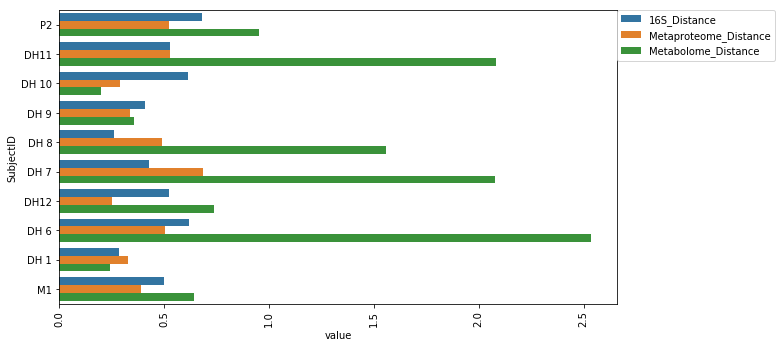

In [325]:
a4_dims = (10, 6)
fig, ax = plt.subplots(figsize = a4_dims)
sns.barplot(x='value', y ='SubjectID', hue = 'variable', data = dis_melt, order = order)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
fig.autofmt_xdate(rotation = 90, ha = 'center')
plt.savefig('./Traditional_Distances_plot.pdf',bbox_inches='tight')

In [15]:
#Pulling out metadata related to patient recovery for ordering image above
metadata = pd.read_csv('../Metadata_For_Proteomics_qiime.txt', sep = '\t', index_col = 'host_subject_id')
metadata.columns

Index(['#SampleID', 'Sample_ID_noqiita', 'BarcodeSequence',
       'LinkerPrimerSequence', 'filename', 'run_prefix', 'qiita_prep_id',
       'age', 'age_unit', 'albumin', 'albumin_units', 'anonymized_name',
       'anti_tnf', 'body_habitat', 'body_product', 'body_site',
       'clinical_remission_d10', 'clinical_remission_d3',
       'clinical_remission_d5', 'collection_timestamp', 'colomectomy',
       'crp_change_d3', 'crp_change_d3_units', 'crp_change_d5',
       'crp_change_d5_units', 'crp_d0', 'crp_d0_units', 'crp_d10',
       'crp_d10_units', 'crp_d3', 'crp_d3_units', 'crp_d5', 'crp_d5_units',
       'days_since_start', 'disease', 'dna_extracted', 'elevation', 'empo_1',
       'empo_2', 'empo_3', 'endoscopic_remission_d10', 'endoscopy_d0',
       'endoscopy_d10', 'env_biome', 'env_feature', 'env_material',
       'env_package', 'ers_change_d5', 'ers_change_d5_units', 'ers_d0',
       'ers_d0_units', 'ers_d10', 'ers_d10_units', 'ers_d5', 'ers_d5_units',
       'full_mayo_change_d1

In [16]:
MayoChange = metadata['partial_mayo_change_d10']

host_subject_id
P2                       1
M1                       8
M2            not provided
DH11                     1
DH11                     1
P2                       1
DH 1                     6
DH 5          not provided
DH 8                     0
DH 7                     2
DH 9                     4
DH12                     2
DH 2          not provided
DH 4          not provided
DH 6                     5
DH 7                     2
DH 9                     4
DH 8                     0
DH 1                     6
DH 6                     5
Healthy1    not applicable
Healthy2    not applicable
DH 10                    1
Healthy3    not applicable
Healthy4    not applicable
DH 10                    1
DH12                     2
DH13                     2
M3                       6
M1                       8
DH13                     2
Name: partial_mayo_change_d10, dtype: object

In [17]:
trial_arm = metadata['trial_arm']

host_subject_id
P2                     sham
M1                treatment
M2             not provided
DH11                   sham
DH11                   sham
P2                     sham
DH 1              treatment
DH 5           not provided
DH 8              treatment
DH 7              treatment
DH 9                   sham
DH12              treatment
DH 2           not provided
DH 4           not provided
DH 6              treatment
DH 7              treatment
DH 9                   sham
DH 8              treatment
DH 1              treatment
DH 6              treatment
Healthy1    helathy_control
Healthy2    helathy_control
DH 10                  sham
Healthy3    helathy_control
Healthy4    helathy_control
DH 10                  sham
DH12              treatment
DH13              treatment
M3                treatment
M1                treatment
DH13              treatment
Name: trial_arm, dtype: object

In [18]:
patient_df = pd.concat([MayoChange,trial_arm],axis=1)

In [19]:
patient_df = patient_df.sort_values(by = ['trial_arm','partial_mayo_change_d10'])

In [20]:
patient_df2 = patient_df.reset_index()
patient_df2 = patient_df2.drop_duplicates(subset = 'host_subject_id', keep = 'first')

In [21]:
patient_df2 = patient_df2[patient_df2['trial_arm']!= 'helathy_control']
patient_df3 = patient_df2[patient_df2['trial_arm']!= 'not provided']

,host_subject_id,partial_mayo_change_d10,trial_arm
8,P2,1,sham
9,DH11,1,sham
12,DH 10,1,sham
14,DH 9,4,sham
16,DH 8,0,treatment
18,DH 7,2,treatment
19,DH12,2,treatment
22,DH13,2,treatment
24,DH 6,5,treatment
26,DH 1,6,treatment


In [230]:
order = list(patient_df3['host_subject_id'])


['P2',
 'DH11',
 'DH 10',
 'DH 9',
 'DH 8',
 'DH 7',
 'DH12',
 'DH13',
 'DH 6',
 'DH 1',
 'M3',
 'M1']

#### Scatter plots of omic distances and severity shifts

In [22]:
distanceDF = distanceDF.merge(patient_df3, left_on = 'SubjectID', right_on = 'host_subject_id')

In [23]:
distanceDF['Metabolome_Distance'] = pd.to_numeric(distanceDF['Metabolome_Distance'])
distanceDF['partial_mayo_change_d10'] = pd.to_numeric(distanceDF['partial_mayo_change_d10'])

In [24]:
distanceDF['Group'] = distanceDF['Group'].replace({'treatment':'g','sham':'r'})

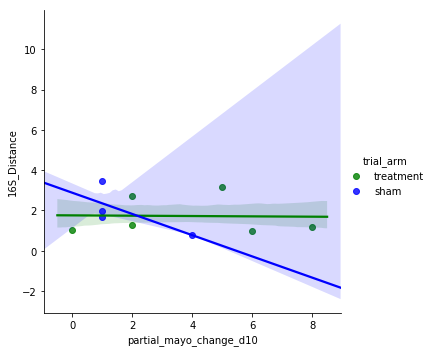

In [40]:
ax2 = sns.lmplot(x='partial_mayo_change_d10', y = '16S_Distance', hue='trial_arm'
                      ,palette=['g','b'],ci=68,data = distanceDF)
plt.savefig('./Beta_distance_scatter_16S_Atchison.pdf', bbox_inches='tight')

In [32]:
distanceDF_trial = distanceDF[distanceDF['Group_x'] == 'treatment']

,#SampleID_x,SubjectID,16S_Distance,Group_x,#SampleID_y,Metaproteome_Distance,Group_y,#SampleID,Metabolome_Distance,Group,host_subject_id,partial_mayo_change_d10,trial_arm
0,11149.mayo.1.10,M1,1.203187,treatment,PD10,0.641712,treatment,PD10,1.574658,g,M1,8,treatment
1,11149.000072850,DH12,2.703148,treatment,PD2,0.739170,treatment,PD2,1.406195,g,DH12,2,treatment
2,11149.dhmc.6.10,DH 6,3.143190,treatment,PD27,2.533930,treatment,PD27,0.697552,g,DH 6,5,treatment
3,11149.dhmc.1.10,DH 1,1.003875,treatment,PD26,0.243118,treatment,PD26,1.385693,g,DH 1,6,treatment
4,11149.dhmc.7.10,DH 7,1.268265,treatment,PD23,2.076653,treatment,PD23,2.383394,g,DH 7,2,treatment
5,11149.dhmc.8.10,DH 8,1.028070,treatment,PD17,1.556268,treatment,PD17,1.384355,g,DH 8,0,treatment


In [35]:
sci.stats.linregress(x=distanceDF_trial['partial_mayo_change_d10'],y=distanceDF_trial['16S_Distance'])

LinregressResult(slope=-0.00817394765829147, intercept=1.7562894859392977, rvalue=-0.025931330704743204, pvalue=0.9611117224959613, stderr=0.1575545634231902)

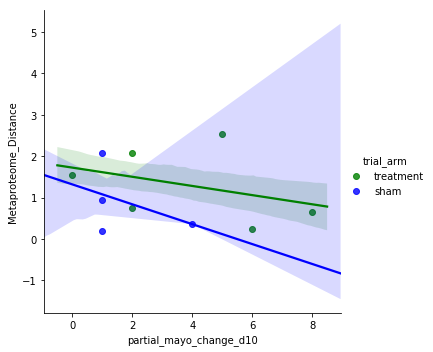

In [41]:
ax3 = sns.lmplot(x='partial_mayo_change_d10', y = 'Metaproteome_Distance', hue='trial_arm'
                      ,palette=['g','b'],ci=68,data = distanceDF)
plt.savefig('./Beta_distance_scatter_Metaproteome_atchison.pdf', bbox_inches='tight')

In [42]:
sci.stats.linregress(x=distanceDF_trial['partial_mayo_change_d10'],y=distanceDF_trial['Metaproteome_Distance'])

LinregressResult(slope=-0.11088240436676255, intercept=1.7235242468452348, rvalue=-0.36863614484150103, pvalue=0.4720932461684924, stderr=0.1398036736593893)

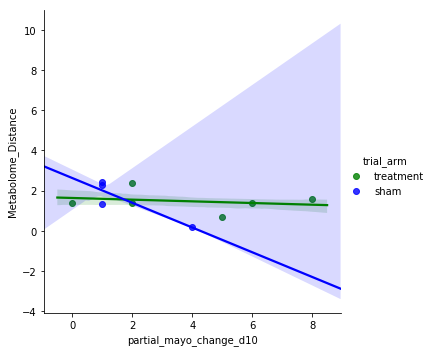

In [43]:
ax = sns.lmplot(x='partial_mayo_change_d10', y = 'Metabolome_Distance', hue='trial_arm'
                      ,palette=['g','b'],ci=68,data = distanceDF)
plt.savefig('./Beta_distance_scatter_Metabolome_atchison.pdf', bbox_inches='tight')

In [44]:
sci.stats.linregress(x=distanceDF_trial['partial_mayo_change_d10'],y=distanceDF_trial['Metabolome_Distance'])

LinregressResult(slope=-0.04186744810362232, intercept=1.632466534425917, rvalue=-0.2319743059299401, pvalue=0.6582800508983855, stderr=0.08777994631290634)

### Performing similar test but with alpha diversity metrics

In [2]:
df1 = pd.read_csv('./16S_FaithPD_Unzip/data/alpha-diversity.tsv', sep ='\t')
df2 = pd.read_csv('./16S_Observedotu_unzip/data/alpha-diversity.tsv', sep ='\t')
df3 = pd.read_csv('./16S_Shannon_Unzip/data/alpha-diversity.tsv', sep ='\t')
df4 = pd.read_csv('./Metabolomics_nooutlier_observedotu_unzip/data/alpha-diversity.tsv', sep ='\t')
df5 = pd.read_csv('./Metabolomics_nooutlier_shannon_unzip/data/alpha-diversity.tsv', sep ='\t')
df6 = pd.read_csv('./Metaproteome_shannon_unzip/data/alpha-diversity.tsv', sep ='\t')

In [3]:
metadata = pd.read_csv('../Metadata_For_Proteomics_qiime.txt', sep = '\t')
metadata['host_subject_id']

0           P2
1           M1
2           M2
3         DH11
4         DH11
5           P2
6         DH 1
7         DH 5
8         DH 8
9         DH 7
10        DH 9
11        DH12
12        DH 2
13        DH 4
14        DH 6
15        DH 7
16        DH 9
17        DH 8
18        DH 1
19        DH 6
20    Healthy1
21    Healthy2
22       DH 10
23    Healthy3
24    Healthy4
25       DH 10
26        DH12
27        DH13
28          M3
29          M1
30        DH13
Name: host_subject_id, dtype: object

In [4]:
df4 = df4.rename(columns={'Unnamed: 0':'MP_id'})

In [5]:
MS_alphadf = pd.concat([df4,df5], axis=1)
MS_alphadf

,MP_id,observed_otus,Unnamed: 0,shannon
0,PD14,301,PD14,4.538261
1,PD1,358,PD1,5.081383
2,PD13,348,PD13,4.343260
3,PD12,331,PD12,5.023533
4,PD4,299,PD4,4.637564
5,PD3,311,PD3,5.073488
6,PD2,348,PD2,4.953313
7,PD9,353,PD9,5.601004
8,PD5,328,PD5,4.958827
9,PD15,327,PD15,5.453325


In [6]:
MS_alphadf = MS_alphadf.merge(metadata, left_on = 'MP_id', right_on = '#SampleID')

In [7]:
MS_alphadf = MS_alphadf[MS_alphadf['partial_mayo_change_d10'] != 'not provided']

In [8]:
MS_alphadf['partial_mayo_change_d10'] = pd.to_numeric(MS_alphadf['partial_mayo_change_d10'])
MS_alphadf['current_partial_mayo'] = pd.to_numeric(MS_alphadf['current_partial_mayo'])

In [9]:
#Find difference in alpha diversity before and after treatment
MS_alphadf_before = MS_alphadf[MS_alphadf['timepoint'] == '1']
MS_alphadf_after = MS_alphadf[MS_alphadf['timepoint'] == '2']

In [10]:
MS_alphadf_before = MS_alphadf_before.rename(columns={'shannon':'shannon_before', 'observed_otus':'observed_otus_before'})
MS_alphadf_after = MS_alphadf_after.rename(columns={'shannon':'shannon_after', 'observed_otus':'observed_otus_after'})
MS_alphadf_after

,MP_id,observed_otus_after,Unnamed: 0,shannon_after,#SampleID,Sample_ID_noqiita,BarcodeSequence,LinkerPrimerSequence,filename,run_prefix,...,response_daytruefalse,sample_type,scientific_name,second_line_therapy,sex,steroids,taxon_id,title,trial_arm,Description
1,PD1,358,PD1,5.081383,PD1,72844,XXQIITAXX,XXQIITAXX,72844.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,TRUE,male,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
3,PD12,331,PD12,5.023533,PD12,72847,XXQIITAXX,XXQIITAXX,72847.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
5,PD3,311,PD3,5.073488,PD3,72849,XXQIITAXX,XXQIITAXX,72849.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,TRUE,female,FALSE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
6,PD2,348,PD2,4.953313,PD2,7285,XXQIITAXX,XXQIITAXX,72850.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
7,PD9,353,PD9,5.601004,PD9,72851,XXQIITAXX,XXQIITAXX,72851.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
10,PD26,334,PD26,3.793778,PD26,dhmc.1.10,XXQIITAXX,XXQIITAXX,dhmc_1_10.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
16,PD27,353,PD27,4.083020,PD27,dhmc.6.10,XXQIITAXX,XXQIITAXX,dhmc_6_10.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,FALSE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
18,PD23,345,PD23,5.814391,PD23,dhmc.7.10,XXQIITAXX,XXQIITAXX,dhmc_7_10.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,TRUE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
20,PD17,358,PD17,5.153049,PD17,dhmc.8.10,XXQIITAXX,XXQIITAXX,dhmc_8_10.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
22,PD19,345,PD19,4.667853,PD19,dhmc.9.10,XXQIITAXX,XXQIITAXX,dhmc_9_10.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...


In [11]:
MS_alphadf2 = MS_alphadf_before.merge(MS_alphadf_after, left_on = 'host_subject_id', right_on = 'host_subject_id')
MS_alphadf2

,MP_id_x,observed_otus_before,Unnamed: 0_x,shannon_before,#SampleID_x,Sample_ID_noqiita_x,BarcodeSequence_x,LinkerPrimerSequence_x,filename_x,run_prefix_x,...,response_daytruefalse_y,sample_type_y,scientific_name_y,second_line_therapy_y,sex_y,steroids_y,taxon_id_y,title_y,trial_arm_y,Description_y
0,PD14,301,PD14,4.538261,PD14,72843,XXQIITAXX,XXQIITAXX,72843.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,TRUE,male,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
1,PD13,348,PD13,4.343260,PD13,72846,XXQIITAXX,XXQIITAXX,72846.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
2,PD4,299,PD4,4.637564,PD4,72848,XXQIITAXX,XXQIITAXX,72848.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,TRUE,female,FALSE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
3,PD5,328,PD5,4.958827,PD5,72852,XXQIITAXX,XXQIITAXX,72852.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
4,PD15,327,PD15,5.453325,PD15,dhmc.1.1,XXQIITAXX,XXQIITAXX,dhmc_1_1.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
5,PD22,349,PD22,5.161041,PD22,dhmc.6.1,XXQIITAXX,XXQIITAXX,dhmc_6_1.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,FALSE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
6,PD18,286,PD18,5.163402,PD18,dhmc.7.1,XXQIITAXX,XXQIITAXX,dhmc_7_1.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,TRUE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
7,PD25,349,PD25,5.691419,PD25,dhmc.8.1,XXQIITAXX,XXQIITAXX,dhmc_8_1.mzXML Peak area,ms_feature_table_dulai,...,FALSE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...
8,PD24,354,PD24,5.092032,PD24,dhmc.9.1,XXQIITAXX,XXQIITAXX,dhmc_9_1.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...
9,PD8,333,PD8,3.458783,PD8,mayo.1.1,XXQIITAXX,XXQIITAXX,mayo_1_1.mzXML Peak area,ms_feature_table_dulai,...,TRUE,stool,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...


In [12]:
MS_alphadf2['Change_in_metabolome_shannon'] = MS_alphadf2['shannon_after'] - MS_alphadf2['shannon_before']
MS_alphadf2['Change_in_metabolome_observedotus'] = MS_alphadf2['observed_otus_after'] - MS_alphadf2['observed_otus_before']
MS_alphadf2

,MP_id_x,observed_otus_before,Unnamed: 0_x,shannon_before,#SampleID_x,Sample_ID_noqiita_x,BarcodeSequence_x,LinkerPrimerSequence_x,filename_x,run_prefix_x,...,scientific_name_y,second_line_therapy_y,sex_y,steroids_y,taxon_id_y,title_y,trial_arm_y,Description_y,Change_in_metabolome_shannon,Change_in_metabolome_observedotus
0,PD14,301,PD14,4.538261,PD14,72843,XXQIITAXX,XXQIITAXX,72843.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,TRUE,male,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...,0.543123,57
1,PD13,348,PD13,4.343260,PD13,72846,XXQIITAXX,XXQIITAXX,72846.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...,0.680273,-17
2,PD4,299,PD4,4.637564,PD4,72848,XXQIITAXX,XXQIITAXX,72848.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,TRUE,female,FALSE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...,0.435923,12
3,PD5,328,PD5,4.958827,PD5,72852,XXQIITAXX,XXQIITAXX,72852.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-0.005514,20
4,PD15,327,PD15,5.453325,PD15,dhmc.1.1,XXQIITAXX,XXQIITAXX,dhmc_1_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-1.659547,7
5,PD22,349,PD22,5.161041,PD22,dhmc.6.1,XXQIITAXX,XXQIITAXX,dhmc_6_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,female,FALSE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-1.078022,4
6,PD18,286,PD18,5.163402,PD18,dhmc.7.1,XXQIITAXX,XXQIITAXX,dhmc_7_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,TRUE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,0.650989,59
7,PD25,349,PD25,5.691419,PD25,dhmc.8.1,XXQIITAXX,XXQIITAXX,dhmc_8_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-0.538370,9
8,PD24,354,PD24,5.092032,PD24,dhmc.9.1,XXQIITAXX,XXQIITAXX,dhmc_9_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,sham,hyperbaric oxygen intervention for ulcerative ...,-0.424179,-9
9,PD8,333,PD8,3.458783,PD8,mayo.1.1,XXQIITAXX,XXQIITAXX,mayo_1_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,0.868017,-3


In [13]:
MS_alphadf2_trial = MS_alphadf2[MS_alphadf2['trial_arm_x'] =='treatment']
MS_alphadf2_trial

,MP_id_x,observed_otus_before,Unnamed: 0_x,shannon_before,#SampleID_x,Sample_ID_noqiita_x,BarcodeSequence_x,LinkerPrimerSequence_x,filename_x,run_prefix_x,...,scientific_name_y,second_line_therapy_y,sex_y,steroids_y,taxon_id_y,title_y,trial_arm_y,Description_y,Change_in_metabolome_shannon,Change_in_metabolome_observedotus
3,PD5,328,PD5,4.958827,PD5,72852,XXQIITAXX,XXQIITAXX,72852.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-0.005514,20
4,PD15,327,PD15,5.453325,PD15,dhmc.1.1,XXQIITAXX,XXQIITAXX,dhmc_1_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-1.659547,7
5,PD22,349,PD22,5.161041,PD22,dhmc.6.1,XXQIITAXX,XXQIITAXX,dhmc_6_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,female,FALSE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-1.078022,4
6,PD18,286,PD18,5.163402,PD18,dhmc.7.1,XXQIITAXX,XXQIITAXX,dhmc_7_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,TRUE,female,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,0.650989,59
7,PD25,349,PD25,5.691419,PD25,dhmc.8.1,XXQIITAXX,XXQIITAXX,dhmc_8_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,-0.538370,9
9,PD8,333,PD8,3.458783,PD8,mayo.1.1,XXQIITAXX,XXQIITAXX,mayo_1_1.mzXML Peak area,ms_feature_table_dulai,...,human gut metagenome,FALSE,male,TRUE,408170,hyperbaric oxygen pilot,treatment,hyperbaric oxygen intervention for ulcerative ...,0.868017,-3


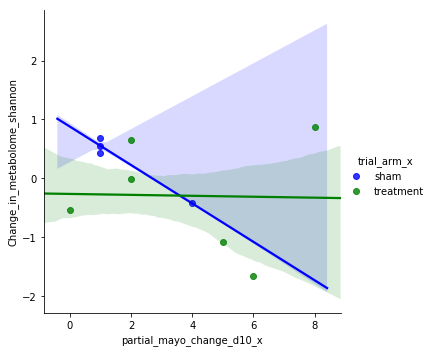

In [477]:
ax = sns.lmplot(x='partial_mayo_change_d10_x', y = 'Change_in_metabolome_shannon', hue='trial_arm_x'
                      ,palette=['b','g'],ci=68,data = MS_alphadf2)
plt.savefig('./Metabolome_shannon_change_byseverityshift_scatter.pdf', bbox_inches='tight')

In [79]:
sci.stats.linregress(x=MS_alphadf2_trial['partial_mayo_change_d10_x'],y=MS_alphadf2_trial['Change_in_metabolome_shannon'])

LinregressResult(slope=-0.007946242846336616, intercept=-0.2632805242232166, rvalue=-0.024120845782102465, pvalue=0.9638257482642177, stderr=0.16466941000589755)

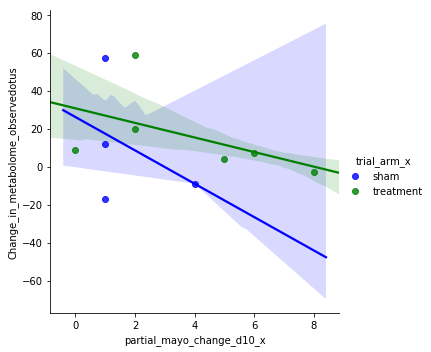

In [478]:
ax = sns.lmplot(x='partial_mayo_change_d10_x', y = 'Change_in_metabolome_observedotus', hue='trial_arm_x'
                      ,palette=['b','g'],ci=68,data = MS_alphadf2)
plt.savefig('./Metabolome_otus_change_byseverityshift_scatter.pdf', bbox_inches='tight')

In [81]:
sci.stats.linregress(x=MS_alphadf2_trial['partial_mayo_change_d10_x'],y=MS_alphadf2_trial['Change_in_metabolome_observedotus'])

LinregressResult(slope=-3.8364312267657987, intercept=30.70631970260223, rvalue=-0.513757207639452, pvalue=0.29716638882694335, stderr=3.2032747785150617)

In [14]:
metadata = pd.read_csv("../16SMetadata_TrialSamplesOnly.txt", sep = '\t')

In [15]:
df1 = df1.rename(columns={'Unnamed: 0':'sampleid'})

In [16]:
alphadf=pd.concat([df1,df2,df3], axis=1)

In [17]:
alphadf = alphadf.merge(metadata, left_on = 'sampleid', right_on = 'sample_name')

In [18]:
alphadf_before = alphadf[alphadf['timepoint'] == 1]
alphadf_after = alphadf[alphadf['timepoint'] == 2]

In [19]:
alphadf_before = alphadf_before.rename(columns={'faith_pd':'faith_pd_before', 'observed_otus':'observed_otus_before','shannon':'shannon_before'})
alphadf_after = alphadf_after.rename(columns={'faith_pd':'faith_pd_after', 'observed_otus':'observed_otus_after','shannon':'shannon_after'})

In [20]:
alphadf2 = alphadf_before.merge(alphadf_after, left_on = 'host_subject_id', right_on = 'host_subject_id')

In [21]:
alphadf2['change_in_faith_pd'] = alphadf2['faith_pd_after'] - alphadf2['faith_pd_before']
alphadf2['change_in_observedotus'] = alphadf2['observed_otus_after'] - alphadf2['observed_otus_before']
alphadf2['change_in_shannon'] = alphadf2['shannon_after'] - alphadf2['shannon_before']

In [22]:
alphadf2.columns

Index(['sampleid_x', 'faith_pd_before', 'Unnamed: 0_x', 'observed_otus_before',
       'Unnamed: 0_x', 'shannon_before', 'sample_name_x', 'age_x',
       'age_unit_x', 'albumin_x',
       ...
       'second_line_therapy_y', 'sex_y', 'steroids_y', 'taxon_id_y',
       'timepoint_y', 'title_y', 'trial_arm_y', 'change_in_faith_pd',
       'change_in_observedotus', 'change_in_shannon'],
      dtype='object', length=194)

In [23]:
alphadf2_trial = alphadf2[alphadf2['trial_arm_x'] == 'treatment']

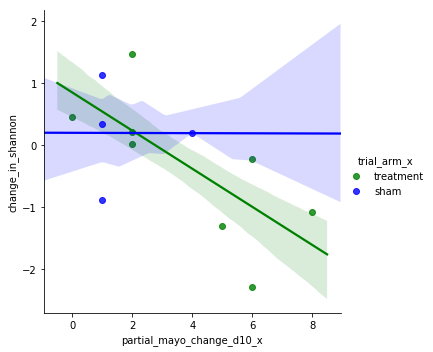

In [474]:
ax = sns.lmplot(x='partial_mayo_change_d10_x', y = 'change_in_shannon', hue='trial_arm_x'
                      ,palette=['g','b'],ci=68,data = alphadf2)
plt.savefig('./16s_shannon_change_byseverityshift_scatter.pdf', bbox_inches='tight')

In [61]:
sci.stats.linregress(x=alphadf2_trial['partial_mayo_change_d10_x'],y=alphadf2_trial['change_in_shannon'])

LinregressResult(slope=-0.3071728952850923, intercept=0.8489015840647199, rvalue=-0.7200316386889657, pvalue=0.043986830916683865, stderr=0.12085882881394641)

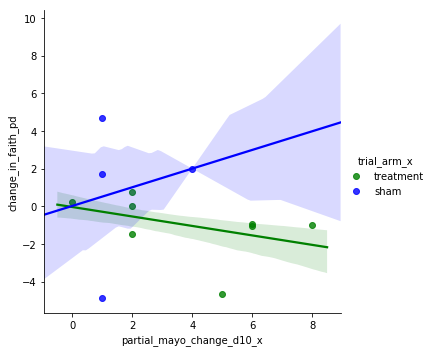

In [475]:
ax = sns.lmplot(x='partial_mayo_change_d10_x', y = 'change_in_faith_pd', hue='trial_arm_x'
                      ,palette=['g','b'],ci=68,data = alphadf2)
plt.savefig('./faithpd_change_byseverityshift_scatter.pdf', bbox_inches='tight')

In [62]:
sci.stats.linregress(x=alphadf2_trial['partial_mayo_change_d10_x'],y=alphadf2_trial['change_in_faith_pd'])

LinregressResult(slope=-0.25127312524349893, intercept=-0.037800822931441935, rvalue=-0.41459428086193556, pvalue=0.3071221238816411, stderr=0.2251601548850602)

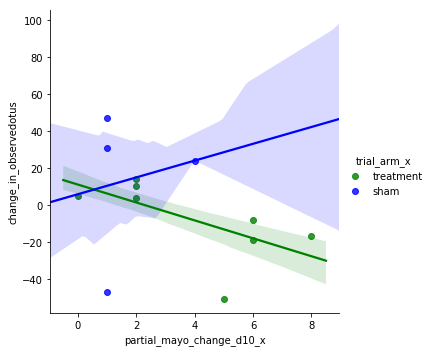

In [476]:
ax = sns.lmplot(x='partial_mayo_change_d10_x', y = 'change_in_observedotus', hue='trial_arm_x'
                      ,palette=['g','b'],ci=68,data = alphadf2)
plt.savefig('./observedotus_change_byseverityshift_scatter.pdf', bbox_inches='tight')

In [63]:
sci.stats.linregress(x=alphadf2_trial['partial_mayo_change_d10_x'],y=alphadf2_trial['change_in_observedotus'])

LinregressResult(slope=-4.855791962174941, intercept=11.066193853427894, rvalue=-0.6269788691630082, pvalue=0.09616578094809498, stderr=2.4631406743737556)